In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./sentiment labelled sentences/amazon_cells_labelled.txt', delimiter= '\t', header=None)

df.columns = ['message', 'pos_or_neg']
print(df.head())

                                             message  pos_or_neg
0  So there is no way for me to plug it in here i...           0
1                        Good case, Excellent value.           1
2                             Great for the jawbone.           1
3  Tied to charger for conversations lasting more...           0
4                                  The mic is great.           1


In [13]:
df['allcaps'] = df.message.str.isupper()
print(df)

                                               message  pos_or_neg  excellent  \
0    So there is no way for me to plug it in here i...           0      False   
1                          Good case, Excellent value.           1       True   
2                               Great for the jawbone.           1      False   
3    Tied to charger for conversations lasting more...           0      False   
4                                    The mic is great.           1      False   
5    I have to jiggle the plug to get it to line up...           0      False   
6    If you have several dozen or several hundred c...           0      False   
7          If you are Razr owner...you must have this!           1      False   
8                  Needless to say, I wasted my money.           0      False   
9                     What a waste of money and time!.           0      False   
10                     And the sound quality is great.           1      False   
11   He was very impressed w

In [5]:
keywords = ['excellent', 'great', 'winner', 'good', 'satisfied', 'impressed', 'best','pleased']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
print(df.head())

                                             message  pos_or_neg  excellent  \
0  So there is no way for me to plug it in here i...           0      False   
1                        Good case, Excellent value.           1       True   
2                             Great for the jawbone.           1      False   
3  Tied to charger for conversations lasting more...           0      False   
4                                  The mic is great.           1      False   

   great  winner   good  satisfied  impressed   best  pleased  
0  False   False  False      False      False  False    False  
1  False   False  False      False      False  False    False  
2  False   False  False      False      False  False    False  
3  False   False  False      False      False  False    False  
4  False   False  False      False      False  False    False  


In [10]:
df['positive'] = (sms_raw['pos_or_neg'] == 1)
print(df.head())

                                             message  pos_or_neg  excellent  \
0  So there is no way for me to plug it in here i...           0      False   
1                        Good case, Excellent value.           1       True   
2                             Great for the jawbone.           1      False   
3  Tied to charger for conversations lasting more...           0      False   
4                                  The mic is great.           1      False   

   great  winner   good  satisfied  impressed   best  pleased  positive  
0  False   False  False      False      False  False    False     False  
1  False   False  False      False      False  False    False      True  
2  False   False  False      False      False  False    False      True  
3  False   False  False      False      False  False    False     False  
4  False   False  False      False      False  False    False      True  


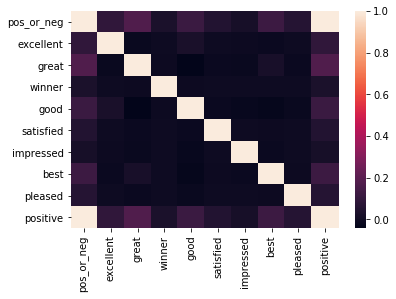

In [11]:
sns.heatmap(df.corr())

In [14]:
data = df[keywords + ['allcaps']]
print(data.head())
target = df['positive']
print(target.head())

   excellent  great  winner   good  satisfied  impressed   best  pleased  \
0      False  False   False  False      False      False  False    False   
1       True  False   False  False      False      False  False    False   
2      False  False   False  False      False      False  False    False   
3      False  False   False  False      False      False  False    False   
4      False  False   False  False      False      False  False    False   

   allcaps  
0    False  
1    False  
2    False  
3    False  
4    False  
0    False
1     True
2     True
3    False
4     True
Name: positive, dtype: bool


In [15]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
print(bnb)
y_pred = bnb.fit(data, target).predict(data)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [16]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target == y_pred).sum()
))

print('success rate = %s' % ((data.shape[0] - (target != y_pred).sum())/data.shape[0]))

Number of mislabeled points out of a total 1000 points : 588
success rate = 0.588


## Increase My Success Rate

In [20]:
df2 =pd.read_csv('./sentiment labelled sentences/amazon_cells_labelled.txt', delimiter= '\t', header=None)

df2.columns = ['message', 'pos_or_neg']
print(df.head())

df2['lower_message'] = " " + df2.message.str.lower() + " "
print(df.head())

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df2[str(key)] = df2.lower_message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
print(df2.head())

                                             message  pos_or_neg  excellent  \
0  So there is no way for me to plug it in here i...           0      False   
1                        Good case, Excellent value.           1       True   
2                             Great for the jawbone.           1      False   
3  Tied to charger for conversations lasting more...           0      False   
4                                  The mic is great.           1      False   

   great  winner   good  satisfied  impressed   best  pleased  positive  \
0  False   False  False      False      False  False    False     False   
1  False   False  False      False      False  False    False      True   
2  False   False  False      False      False  False    False      True   
3  False   False  False      False      False  False    False     False   
4  False   False  False      False      False  False    False      True   

   allcaps  
0    False  
1    False  
2    False  
3    False  
4    Fals

In [21]:
df2['positive'] = (df2['pos_or_neg'] == 1)
df2['allcaps'] = df2.message.str.isupper()
print(df2.head())

data2 = df2[keywords + ['allcaps']]

target2 = df2['positive']


y_pred2 = bnb.fit(data2, target2).predict(data2)

print(y_pred[:10])
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 == y_pred2).sum()
))

print('success rate = %s' % ((data2.shape[0] - (target2 != y_pred2).sum())/data2.shape[0]))


                                             message  pos_or_neg  \
0  So there is no way for me to plug it in here i...           0   
1                        Good case, Excellent value.           1   
2                             Great for the jawbone.           1   
3  Tied to charger for conversations lasting more...           0   
4                                  The mic is great.           1   

                                       lower_message  excellent  great  \
0   so there is no way for me to plug it in here ...      False  False   
1                       good case, excellent value.        True  False   
2                            great for the jawbone.       False   True   
3   tied to charger for conversations lasting mor...      False  False   
4                                 the mic is great.       False  False   

   winner   good  satisfied  impressed   best  pleased  positive  allcaps  
0   False  False      False      False  False    False     False    Fa

In [22]:
df2.head()

,message,pos_or_neg,lower_message,excellent,great,winner,good,satisfied,impressed,best,pleased,positive,allcaps
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here ...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,"good case, excellent value.",True,False,False,True,False,False,False,False,True,False
2,Great for the jawbone.,1,great for the jawbone.,False,True,False,False,False,False,False,False,True,False
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting mor...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,the mic is great.,False,False,False,False,False,False,False,False,True,False


In [23]:
df2['lower_message'] = df2['lower_message'].str.replace("/[.,\/#!$%\^&\*;:{}=\-_`~()]/g"," ")


df2['lower_message']



0       so there is no way for me to plug it in here ...
1                           good case, excellent value. 
2                                great for the jawbone. 
3       tied to charger for conversations lasting mor...
4                                     the mic is great. 
5       i have to jiggle the plug to get it to line u...
6       if you have several dozen or several hundred ...
7           if you are razr owner...you must have this! 
8                   needless to say, i wasted my money. 
9                      what a waste of money and time!. 
10                      and the sound quality is great. 
11      he was very impressed when going from the ori...
12      if the two were seperated by a mere 5+ ft i s...
13                             very good quality though 
14      the design is very odd, as the ear "clip" is ...
15      highly recommend for any one who has a blue t...
16                  i advise everyone do not be fooled! 
17                             

In [24]:
import re

df2['lower_message'].str.replace(r"/[.,\/#!$%\^&\*;:{}=\-_`~()]/g","" )

0       so there is no way for me to plug it in here ...
1                           good case, excellent value. 
2                                great for the jawbone. 
3       tied to charger for conversations lasting mor...
4                                     the mic is great. 
5       i have to jiggle the plug to get it to line u...
6       if you have several dozen or several hundred ...
7           if you are razr owner...you must have this! 
8                   needless to say, i wasted my money. 
9                      what a waste of money and time!. 
10                      and the sound quality is great. 
11      he was very impressed when going from the ori...
12      if the two were seperated by a mere 5+ ft i s...
13                             very good quality though 
14      the design is very odd, as the ear "clip" is ...
15      highly recommend for any one who has a blue t...
16                  i advise everyone do not be fooled! 
17                             